### Objective: 
        To compare different classifiers and to predict the type of class of cardiac arrhythmia from the dataset 

Cardiac arrhythmia is any abnormal heart rate. Cardiac arrhythmia is classified into 16 different classes namely:
#### Class Type...........Class Name   

   1............................Normal                          
   2............................Ischemic changes (Coronary Artery Disease)   
   3............................Old Anterior Myocardial Infarction           
   4............................Old Inferior Myocardial Infarction           
   5............................Sinus tachycardy                       
   6............................Sinus bradycardy                       
   7............................Ventricular Premature Contraction (PVC)       
   8............................Supraventricular Premature Contraction        
   9............................Left bundle branch block                        
   10..........................Right bundle branch block                   
   11..........................1) degree AtrioVentricular block                   
   12..........................2) degree AV block                    
   13..........................3) degree AV block                    
   14..........................Left ventricule hypertrophy                 
   15..........................Atrial Fibrillation or Flutter                
   16..........................Others                           

### 1.1 Importing libraries 

In [174]:
import pandas as pd
import numpy as pandas
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

###  1.2 Loading dataset
    Downloaded the dataset from UCI machine learning repository https://archive.ics.uci.edu/ml/datasets/Arrhythmia.It consists of details of 452 patients and 280 attributes which belongs to the ECG readings.

In [202]:
ca=pd.read_excel(r'C:\Users\knand\Downloads\uciarrhythmia.xlsx')

In [176]:
ca.head()

,age,sex,height,weight,qrs_duration,p-r_interval,q-t_interval,t_interval,p_interval,qrs,...,KY,KZ,LA,LB,LC,LD,LE,LF,LG,classtype
0,75,0,190,80,91,193,371,174,121,-16,...,0.0,9.0,-0.9,0.0,0,0.9,2.9,23.3,49.4,8
1,56,1,165,64,81,174,401,149,39,25,...,0.0,8.5,0.0,0.0,0,0.2,2.1,20.4,38.8,6
2,54,0,172,95,138,163,386,185,102,96,...,0.0,9.5,-2.4,0.0,0,0.3,3.4,12.3,49.0,10
3,55,0,175,94,100,202,380,179,143,28,...,0.0,12.2,-2.2,0.0,0,0.4,2.6,34.6,61.6,1
4,75,0,190,80,88,181,360,177,103,-16,...,0.0,13.1,-3.6,0.0,0,-0.1,3.9,25.4,62.8,7


In [170]:
ca.describe()

,age,sex,height,weight,qrs_duration,p-r_interval,q-t_interval,t_interval,p_interval,qrs,...,KY,KZ,LA,LB,LC,LD,LE,LF,LG,classtype
count,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,...,452.000000,452.000000,452.000000,452.000000,452.0,452.000000,452.000000,452.000000,452.000000,452.000000
mean,46.471239,0.550885,166.188053,68.170354,88.920354,155.152655,367.207965,169.949115,90.004425,33.676991,...,-0.278982,9.048009,-1.457301,0.003982,0.0,0.514823,1.222345,19.326106,29.473230,3.880531
std,16.466631,0.497955,37.170340,16.590803,15.364394,44.842283,33.385421,35.633072,25.826643,45.431434,...,0.548876,3.472862,2.002430,0.050118,0.0,0.347531,1.426052,13.503922,18.493927,4.407097
min,0.000000,0.000000,105.000000,6.000000,55.000000,0.000000,232.000000,108.000000,0.000000,-172.000000,...,-4.100000,0.000000,-28.600000,0.000000,0.0,-0.800000,-6.000000,-44.200000,-38.600000,1.000000
25%,36.000000,0.000000,160.000000,59.000000,80.000000,142.000000,350.000000,148.000000,79.000000,3.750000,...,-0.425000,6.600000,-2.100000,0.000000,0.0,0.400000,0.500000,11.450000,17.550000,1.000000
50%,47.000000,1.000000,164.000000,68.000000,86.000000,157.000000,367.000000,162.000000,91.000000,40.000000,...,0.000000,8.800000,-1.100000,0.000000,0.0,0.500000,1.350000,18.100000,27.900000,1.000000
75%,58.000000,1.000000,170.000000,79.000000,94.000000,175.000000,384.000000,179.000000,102.000000,66.000000,...,0.000000,11.200000,0.000000,0.000000,0.0,0.700000,2.100000,25.825000,41.125000,6.000000
max,83.000000,1.000000,780.000000,176.000000,188.000000,524.000000,509.000000,381.000000,205.000000,169.000000,...,0.000000,23.600000,0.000000,0.800000,0.0,2.400000,6.000000,88.800000,115.900000,16.000000


In [8]:
ca.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 452 entries, 0 to 451
Columns: 280 entries, age to classtype
dtypes: float64(121), int64(159)
memory usage: 988.9 KB


In [9]:
ca.keys()

Index(['age', 'sex', 'height', 'weight', 'qrs_duration', 'p-r_interval',
       'q-t_interval', 't_interval', 'p_interval', 'qrs',
       ...
       'KY', 'KZ', 'LA', 'LB', 'LC', 'LD', 'LE', 'LF', 'LG', 'classtype'],
      dtype='object', length=280)

### 1.3  Data cleaning

In [10]:
ca.isnull()

,age,sex,height,weight,qrs_duration,p-r_interval,q-t_interval,t_interval,p_interval,qrs,...,KY,KZ,LA,LB,LC,LD,LE,LF,LG,classtype
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
447,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
448,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
449,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
450,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


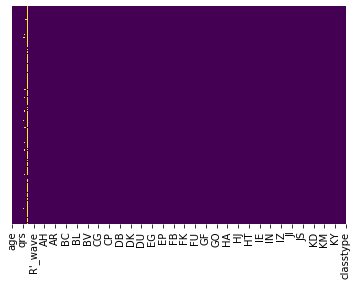

In [16]:
sns.heatmap(ca.isnull(),yticklabels=False,cbar=False,cmap="viridis")

This thin yellow line represents the null values in the dataset.

In [12]:
total = ca.isnull().sum().sort_values(ascending=False)

In [17]:
percent = (ca.isnull().sum()/ca.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head()

,Total,Percent
J,377,0.834071
P,25,0.055310
T,10,0.022124
heart_rate,1,0.002212
QRST,1,0.002212


This table provides us the details of the number of missing values in each column.

In [177]:
ca['J']=ca['J'].fillna(0)
ca['P']=ca['P'].fillna(0)
ca['T']=ca['T'].fillna(0)
ca['heart_rate']=ca['heart_rate'].fillna(0)
ca['QRST']=ca['QRST'].fillna(0)

In [178]:
total = ca.isnull().sum().sort_values(ascending=False)
percent = (ca.isnull().sum()/ca.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head()

,Total,Percent
classtype,0,0.0
DG,0,0.0
DA,0,0.0
DB,0,0.0
DC,0,0.0


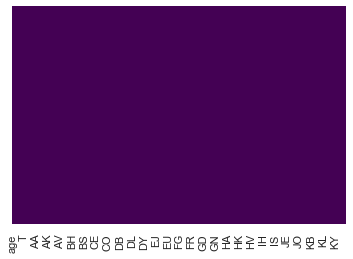

In [179]:
sns.heatmap(ca.isnull(),yticklabels=False,cbar=False,cmap="viridis")

Now all missing values are replaced by 0. And the thin yellow line vanishes which says dataset is free of missing values

In [180]:
ca.columns[(ca == 0).all()]

Index(['S'_wave', 'CB', 'CD', 'CS', 'EV', 'EY', 'FF', 'FH', 'FJ', 'FL', 'FS',
       'FZ', 'GA', 'GH', 'IB', 'KP', 'LC'],
      dtype='object')

The columns which contains all values as 0 are removed.

In [289]:
ca.drop(["S'_wave", 'CB', 'CD', 'CS', 'EV', 'EY', 'FF', 'FH', 'FJ', 'FL', 'FS',
       'FZ', 'GA', 'GH', 'IB', 'KP', 'LC'], axis=1, inplace=True)

In [182]:
ca.head()

,age,sex,height,weight,qrs_duration,p-r_interval,q-t_interval,t_interval,p_interval,qrs,...,KV,KY,KZ,LA,LB,LD,LE,LF,LG,classtype
0,75,0,190,80,91,193,371,174,121,-16,...,-0.3,0.0,9.0,-0.9,0.0,0.9,2.9,23.3,49.4,8
1,56,1,165,64,81,174,401,149,39,25,...,-0.5,0.0,8.5,0.0,0.0,0.2,2.1,20.4,38.8,6
2,54,0,172,95,138,163,386,185,102,96,...,0.9,0.0,9.5,-2.4,0.0,0.3,3.4,12.3,49.0,10
3,55,0,175,94,100,202,380,179,143,28,...,0.1,0.0,12.2,-2.2,0.0,0.4,2.6,34.6,61.6,1
4,75,0,190,80,88,181,360,177,103,-16,...,-0.4,0.0,13.1,-3.6,0.0,-0.1,3.9,25.4,62.8,7


In [502]:
ca.corr()

,age,sex,height,weight,qrs_duration,p-r_interval,q-t_interval,t_interval,p_interval,qrs,...,KV,KY,KZ,LA,LB,LD,LE,LF,LG,classtype
age,1.000000,-0.059042,-0.109458,0.381555,-0.004032,0.041149,0.195691,0.025654,0.099755,-0.265868,...,-0.219194,0.164816,-0.158009,0.082376,0.090413,-0.037877,-0.271504,0.018043,-0.199728,-0.092381
sex,-0.059042,1.000000,-0.124685,-0.248104,-0.337101,-0.046771,0.072052,-0.184736,-0.081051,0.069434,...,-0.013236,0.230938,-0.042638,0.092879,0.027401,0.014210,0.065684,0.031688,0.046605,-0.178080
height,-0.109458,-0.124685,1.000000,-0.074957,-0.006329,0.013601,-0.237314,-0.038411,0.029025,0.061539,...,0.130048,-0.018876,-0.073439,-0.091361,-0.002545,0.067670,-0.008471,-0.090370,-0.092235,0.006648
weight,0.381555,-0.248104,-0.074957,1.000000,0.100094,0.119826,0.118657,0.149987,0.120668,-0.173355,...,-0.124160,0.050471,-0.026926,0.051946,0.047448,-0.046278,-0.144721,0.062285,-0.050682,-0.090151
qrs_duration,-0.004032,-0.337101,-0.006329,0.100094,1.000000,0.021831,0.218681,0.397435,0.049682,-0.146043,...,-0.258353,-0.198941,0.091384,-0.228688,-0.013697,-0.065596,-0.222170,0.129796,-0.082791,0.323879
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
LD,-0.037877,0.014210,0.067670,-0.046278,-0.065596,0.143272,-0.034971,0.049175,0.248092,0.082009,...,0.033788,-0.085446,-0.008013,-0.092069,-0.019946,1.000000,-0.043307,-0.069852,-0.064171,-0.086427
LE,-0.271504,0.065684,-0.008471,-0.144721,-0.222170,0.061160,-0.038884,-0.184846,0.016054,0.063300,...,0.540750,0.116959,0.093749,-0.072408,-0.017690,-0.043307,1.000000,-0.124004,0.687877,-0.030798
LF,0.018043,0.031688,-0.090370,0.062285,0.129796,-0.027691,0.256200,0.130202,-0.016365,0.297780,...,-0.580298,0.002630,0.671383,0.562825,-0.051131,-0.069852,-0.124004,1.000000,0.611219,0.003476
LG,-0.199728,0.046605,-0.092235,-0.050682,-0.082791,0.021048,0.150979,-0.014430,0.004283,0.255203,...,0.011432,0.082538,0.560374,0.341484,-0.049667,-0.064171,0.687877,0.611219,1.000000,-0.009275


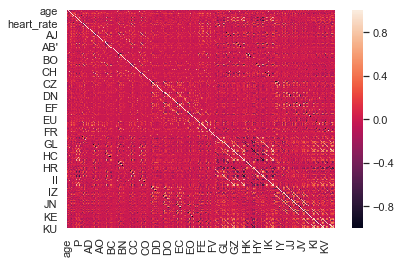

In [503]:
sns.heatmap(ca.corr())

In [504]:
ca.shape

(452, 263)

### 1.4  Heatmap Representation 
    This heatmaps helps to find inter-relation between all the features/attributes of the dataset

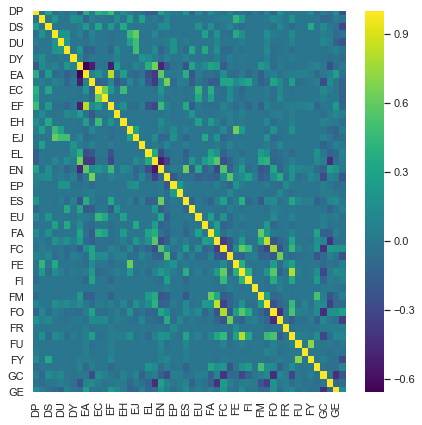

In [183]:
fig, ax = plt.subplots(figsize=(7, 7))
sns.heatmap( ca[ca.columns.values[100:150]].corr(),cmap="viridis");

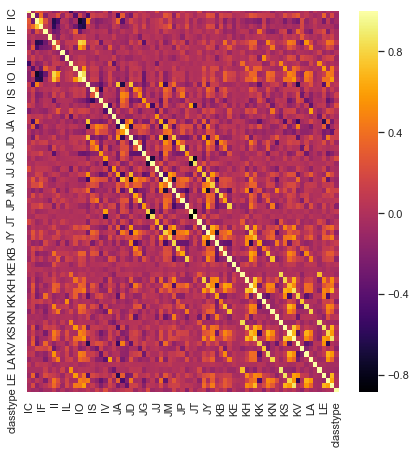

In [184]:
fig, ax = plt.subplots(figsize=(7, 7))
sns.heatmap(ca[ca.columns.values[190:263]].corr(),cmap="inferno");

C:\Users\knand\Anaconda3.x\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\knand\Anaconda3.x\lib\site-packages\seaborn\categorical.py:3672: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


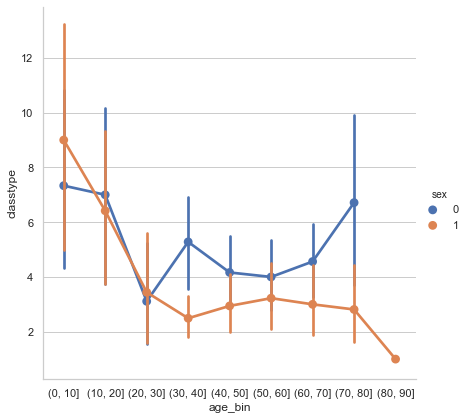

In [185]:
ca['age_bin']=pd.cut(ca['age'],list(range(0,100,10)))
sns.set(style='whitegrid')
sns.factorplot('age_bin','classtype',hue='sex',data=ca,size=6)

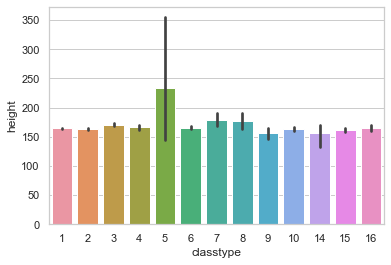

In [51]:
sns.barplot(x='classtype',y='height',data=ca)

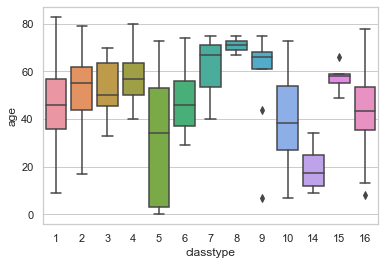

In [78]:
sns.boxplot(x='classtype',y='age',data=ca)

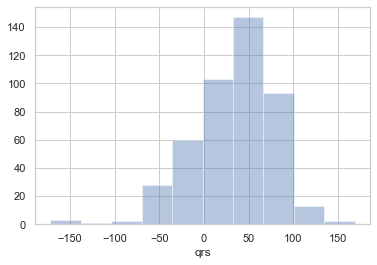

In [53]:
sns.distplot(ca['qrs'],kde=False,bins=10)

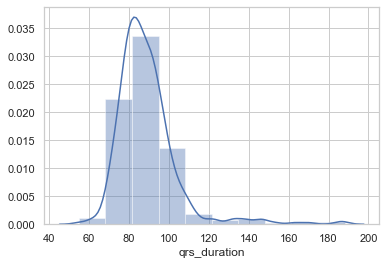

In [54]:
sns.distplot(ca['qrs_duration'],bins=10)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12]),
 <a list of 13 Text xticklabel objects>)

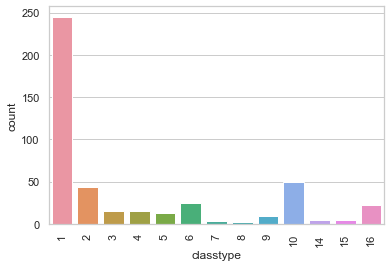

In [511]:
sns.countplot(x="classtype",data=ca)
plt.xticks(rotation=90)

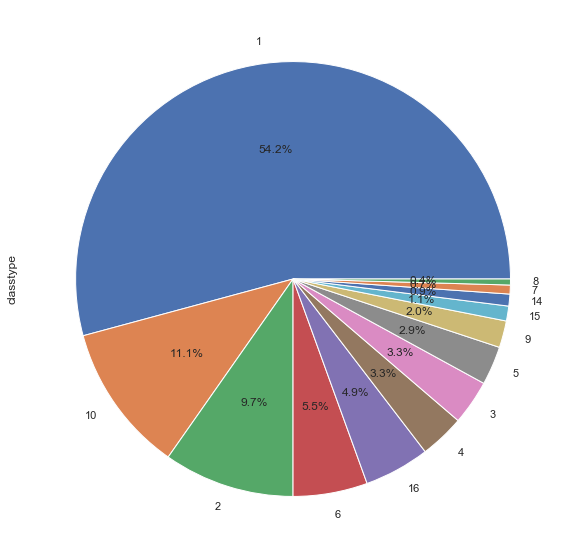

In [56]:
plt.figure(figsize=(10,10))
ca.classtype.value_counts().plot(kind = 'pie',autopct='%1.1f%%')

### 1.5 Train Test Split  (70/30)

In [265]:
X=ca[ca.columns.values]
Y=ca['classtype']

In [266]:
X=X.drop(['classtype'],axis=1)

In [205]:
X.head()

,age,sex,height,weight,qrs_duration,p-r_interval,q-t_interval,t_interval,p_interval,qrs,...,KV,KY,KZ,LA,LB,LC,LD,LE,LF,LG
0,75,0,190,80,91,193,371,174,121,-16,...,-0.3,0.0,9.0,-0.9,0.0,0,0.9,2.9,23.3,49.4
1,56,1,165,64,81,174,401,149,39,25,...,-0.5,0.0,8.5,0.0,0.0,0,0.2,2.1,20.4,38.8
2,54,0,172,95,138,163,386,185,102,96,...,0.9,0.0,9.5,-2.4,0.0,0,0.3,3.4,12.3,49.0
3,55,0,175,94,100,202,380,179,143,28,...,0.1,0.0,12.2,-2.2,0.0,0,0.4,2.6,34.6,61.6
4,75,0,190,80,88,181,360,177,103,-16,...,-0.4,0.0,13.1,-3.6,0.0,0,-0.1,3.9,25.4,62.8


In [206]:
X.shape

(452, 279)

In [207]:
Y.shape

(452,)

In [267]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.30, random_state=50)

### 1.6  Importing required sklearn libraries and evaluation metrics 

In [234]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import classification_report

#### 1.6.1 Logistic Regression 

In [235]:
lr = LogisticRegression()
lr.fit(X_train, Y_train)
ypred_lr = lr.predict(X_test)

acc_lr = lr.score(X_test, Y_test)
f1_lr=f1_score(Y_test, ypred_lr, average='macro')
prec_lr=precision_score(Y_test, ypred_lr, average='macro')

print("Confusion Matrix: ",confusion_matrix(Y_test, ypred_lr))
print()
print("Accuracy %: ",acc_lr*100)
print("f1 Score: ",f1_lr)
print("Precision: ",prec_lr)

C:\Users\knand\Anaconda3.x\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\knand\Anaconda3.x\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


Confusion Matrix:  [[62  3  0  0  0  3  1  0  5  0  0  4]
 [ 4  6  0  0  0  1  0  0  0  0  0  0]
 [ 0  0  1  0  0  0  0  0  0  0  0  0]
 [ 2  1  0  1  0  0  0  0  1  0  0  0]
 [ 1  0  0  1  0  0  0  0  0  0  0  1]
 [ 3  0  0  0  0  2  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  1  0  0  0  0  0  1  0  0  0  0]
 [ 3  0  0  0  0  2  0  0 12  0  0  0]
 [ 1  1  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  1  0]
 [ 7  1  0  0  0  0  0  0  1  0  1  1]]

Accuracy %:  63.970588235294116
f1 Score:  0.4151033323028208
Precision:  0.43806433561506486


C:\Users\knand\Anaconda3.x\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\knand\Anaconda3.x\lib\site-packages\sklearn\metrics\classification.py:1439: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
C:\Users\knand\Anaconda3.x\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


#### 1.6.2  Linear Support Vector Machine model 

linsvc= LinearSVC()
linsvc.fit(X_train, Y_train)
ypred_linsvc = linsvc.predict(X_test)

acc_linsvc = linsvc.score(X_test, Y_test)
f1_linsvc=f1_score(Y_test, ypred_linsvc, average='macro')
prec_linsvc=precision_score(Y_test, ypred_linsvc, average='macro')

print("Confusion Matrix: ",confusion_matrix(Y_test, ypred_linsvc))
print()
print("Accuracy %: ",acc_linsvc*100)
print("f1 Score: ",f1_linsvc)
print("Precision: ",prec_linsvc)

#### 1.6.3 K Nearest Neighbor 

In [238]:
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, Y_train)
ypred_knn = knn.predict(X_test)

acc_knn = knn.score(X_test, Y_test)
f1_knn=f1_score(Y_test, ypred_knn, average='macro')
prec_knn=precision_score(Y_test, ypred_knn, average='macro')

print("Confusion Matrix: ",confusion_matrix(Y_test, ypred_knn))
print()
print("Accuracy %: ",acc_knn*100)
print("f1 Score: ",f1_knn)
print("Precision: ",prec_knn)

Confusion Matrix:  [[73  1  0  1  0  3  0  0  0  0  0]
 [ 7  2  0  0  0  2  0  0  0  0  0]
 [ 0  0  1  0  0  0  0  0  0  0  0]
 [ 5  0  0  0  0  0  0  0  0  0  0]
 [ 2  0  0  0  0  0  0  1  0  0  0]
 [ 4  0  0  0  0  1  0  0  0  0  0]
 [ 0  1  0  0  0  0  1  0  0  0  0]
 [14  0  0  0  0  0  0  3  0  0  0]
 [ 1  1  0  0  0  0  0  0  0  0  0]
 [ 1  0  0  0  0  0  0  0  0  0  0]
 [10  1  0  0  0  0  0  0  0  0  0]]

Accuracy %:  59.55882352941176
f1 Score:  0.2834737455058311
Precision:  0.3521756021756022


C:\Users\knand\Anaconda3.x\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\knand\Anaconda3.x\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


#### 1.6.4 Decision tree 

In [239]:
dt = DecisionTreeClassifier()
dt.fit(X_train, Y_train)
ypred_dt = dt.predict(X_test)

acc_dt = dt.score(X_test, Y_test)
f1_dt=f1_score(Y_test, ypred_dt, average='macro')
prec_dt =precision_score(Y_test, ypred_dt, average='macro')

print("Confusion Matrix: ",confusion_matrix(Y_test, ypred_dt))
print()
print("Accuracy %: ",acc_dt*100)
print("f1 Score: ",f1_dt)
print("Precision: ",prec_dt)

Confusion Matrix:  [[65  4  0  0  1  0  0  1  0  4  0  2  1]
 [ 5  5  0  0  0  1  0  0  0  0  0  0  0]
 [ 0  0  1  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  3  1  0  0  1  0  0  0  0  0]
 [ 1  1  0  0  1  0  0  0  0  0  0  0  0]
 [ 1  0  0  0  0  4  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  1  0  0  1  0  0  0  0]
 [ 4  1  0  0  0  0  0  0  0 11  0  1  0]
 [ 0  1  0  0  0  0  1  0  0  0  0  0  0]
 [ 0  1  0  0  0  0  0  0  0  0  0  0  0]
 [ 6  2  0  0  0  0  0  0  0  0  0  1  2]]

Accuracy %:  68.38235294117648
f1 Score:  0.4344309536617229
Precision:  0.5020012507817386


C:\Users\knand\Anaconda3.x\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\knand\Anaconda3.x\lib\site-packages\sklearn\metrics\classification.py:1439: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
C:\Users\knand\Anaconda3.x\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


#### 1.6.5 Random Forest

In [241]:
rf = RandomForestClassifier()
rf.fit(X_train, Y_train)
ypred_rf = rf.predict(X_test)

acc_rf = rf.score(X_test, Y_test)
f1_rf=f1_score(Y_test, ypred_rf, average='macro')
prec_rf=precision_score(Y_test, ypred_rf, average='macro')

print("Confusion Matrix: ",confusion_matrix(Y_test, ypred_rf))
print()
print("Accuracy %: ",acc_rf*100)
print("f1 Score: ",f1_rf)
print("Precision: ",prec_rf)

Confusion Matrix:  [[71  2  1  0  1  1  0  2  0  0  0]
 [ 4  7  0  0  0  0  0  0  0  0  0]
 [ 0  0  1  0  0  0  0  0  0  0  0]
 [ 1  1  1  2  0  0  0  0  0  0  0]
 [ 2  0  0  0  0  0  0  1  0  0  0]
 [ 1  0  0  0  0  4  0  0  0  0  0]
 [ 0  0  0  0  0  0  2  0  0  0  0]
 [ 6  0  0  0  0  0  0 11  0  0  0]
 [ 0  1  0  0  0  0  0  0  0  0  1]
 [ 0  1  0  0  0  0  0  0  0  0  0]
 [ 8  1  1  0  0  0  0  1  0  0  0]]

Accuracy %:  72.05882352941177
f1 Score:  0.442970114680641
Precision:  0.4622941574554478


C:\Users\knand\Anaconda3.x\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\knand\Anaconda3.x\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\knand\Anaconda3.x\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


#### 1.6.6 Naive Bayes 

In [243]:
nb = GaussianNB()
nb.fit(X_train, Y_train)
ypred_nb = nb.predict(X_test)

acc_nb = nb.score(X_test, Y_test)
f1_nb=f1_score(Y_test, ypred_nb, average='macro')
prec_nb=precision_score(Y_test, ypred_nb, average='macro')

print("Confusion Matrix: ",confusion_matrix(Y_test, ypred_nb))
print()
print("Accuracy %: ",acc_nb*100)
print("f1 Score: ",f1_nb)
print("Precision: ",prec_nb)

Confusion Matrix:  [[ 4  6  0 13  1  7  0  6  0  0 41]
 [ 0  3  1  2  0  1  0  1  0  0  3]
 [ 0  0  1  0  0  0  0  0  0  0  0]
 [ 0  1  0  2  0  1  0  1  0  0  0]
 [ 0  2  0  1  0  0  0  0  0  0  0]
 [ 0  0  1  0  1  0  0  0  0  0  3]
 [ 1  1  0  0  0  0  0  0  0  0  0]
 [ 2  1  0  0  0  0  0  5  0  0  9]
 [ 0  1  0  0  0  0  0  0  0  0  1]
 [ 0  1  0  0  0  0  0  0  0  0  0]
 [ 1  2  1  0  2  1  0  0  0  0  4]]

Accuracy %:  13.970588235294118
f1 Score:  0.11984339049643608
Precision:  0.1343606302622696


C:\Users\knand\Anaconda3.x\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\knand\Anaconda3.x\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


#### 1.6.7 Perceptron  

In [245]:
per = Perceptron()
per.fit(X_train, Y_train)
ypred_per = per.predict(X_test)

acc_per = per.score(X_test, Y_test)
f1_per=f1_score(Y_test, ypred_per, average='macro')
prec_per=precision_score(Y_test, ypred_per, average='macro')

print("Confusion Matrix: ",confusion_matrix(Y_test, ypred_per))
print()
print("Accuracy %: ",acc_per*100)
print("f1 Score: ",f1_per)
print("Precision: ",prec_per)

Confusion Matrix:  [[25 24  0  1  1  1 10  0  0  0  0 16]
 [ 0  9  0  0  0  0  0  0  0  0  0  2]
 [ 0  0  1  0  0  0  0  0  0  0  0  0]
 [ 0  1  0  4  0  0  0  0  0  0  0  0]
 [ 0  1  0  1  0  0  0  0  1  0  0  0]
 [ 2  1  0  0  0  0  1  0  0  0  0  1]
 [ 0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  1  0  0  0  0  1  0  0  0  0  0]
 [ 0  0  0  0  0  0  2  0  6  0  0  9]
 [ 0  1  0  0  0  0  0  0  0  1  0  0]
 [ 0  1  0  0  0  0  0  0  0  0  0  0]
 [ 2  4  0  1  0  0  1  0  1  0  0  2]]

Accuracy %:  35.294117647058826
f1 Score:  0.30929311349188254
Precision:  0.3716222107661562


C:\Users\knand\Anaconda3.x\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\knand\Anaconda3.x\lib\site-packages\sklearn\metrics\classification.py:1439: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
C:\Users\knand\Anaconda3.x\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


#### 1.6.8 Stochastic Gradient Descent classifier

In [246]:
sgd = SGDClassifier()
sgd.fit(X_train, Y_train)
ypred_sgd = sgd.predict(X_test)

acc_sgd = sgd.score(X_test, Y_test)
f1_sgd=f1_score(Y_test, ypred_sgd, average='macro')
prec_sgd=precision_score(Y_test, ypred_sgd, average='macro')

print("Confusion Matrix: ",confusion_matrix(Y_test, ypred_sgd))
print()
print("Accuracy %: ",acc_sgd*100)
print("f1 Score: ",f1_sgd)
print("Precision: ",prec_sgd)

Confusion Matrix:  [[41 37  0  0  0  0  0  0  0  0  0]
 [ 1 10  0  0  0  0  0  0  0  0  0]
 [ 1  0  0  0  0  0  0  0  0  0  0]
 [ 0  5  0  0  0  0  0  0  0  0  0]
 [ 0  2  0  0  0  0  0  1  0  0  0]
 [ 3  2  0  0  0  0  0  0  0  0  0]
 [ 0  1  0  0  0  0  1  0  0  0  0]
 [ 8  5  0  0  0  0  0  4  0  0  0]
 [ 0  2  0  0  0  0  0  0  0  0  0]
 [ 0  1  0  0  0  0  0  0  0  0  0]
 [ 3  8  0  0  0  0  0  0  0  0  0]]

Accuracy %:  41.17647058823529
f1 Score:  0.1705277887096069
Precision:  0.24148041336217255


C:\Users\knand\Anaconda3.x\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\knand\Anaconda3.x\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


#### 1.6.9 AdaBoost Classifier 

In [247]:
adb = AdaBoostClassifier()
adb.fit(X_train, Y_train)
ypred_adb = adb.predict(X_test)

acc_adb = adb.score(X_test, Y_test)
f1_adb =f1_score(Y_test, ypred_adb, average='macro')
prec_adb =precision_score(Y_test, ypred_adb, average='macro')

print("Confusion Matrix: ",confusion_matrix(Y_test, ypred_adb))
print()
print("Accuracy %: ",acc_adb*100)
print("f1 Score: ",f1_adb)
print("Precision: ",prec_adb)

Confusion Matrix:  [[76  0  0  0  0  0  0  2  0  0  0]
 [ 9  0  0  0  0  0  0  1  1  0  0]
 [ 1  0  0  0  0  0  0  0  0  0  0]
 [ 5  0  0  0  0  0  0  0  0  0  0]
 [ 3  0  0  0  0  0  0  0  0  0  0]
 [ 5  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  2  0  0  0  0]
 [ 6  0  0  0  0  0  0 11  0  0  0]
 [ 2  0  0  0  0  0  0  0  0  0  0]
 [ 1  0  0  0  0  0  0  0  0  0  0]
 [10  0  0  0  0  0  0  1  0  0  0]]

Accuracy %:  65.44117647058823
f1 Score:  0.2239100185528757
Precision:  0.21612737544940935


C:\Users\knand\Anaconda3.x\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\knand\Anaconda3.x\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


###1.6.10 Gradient Boosting Classifier 

In [248]:
gb = GradientBoostingClassifier(n_estimators=10)
gb.fit(X_train, Y_train)
ypred_gb = gb.predict(X_test)

acc_gb = gb.score(X_test, Y_test)
f1_gb=f1_score(Y_test, ypred_gb, average='macro')
prec_gb=precision_score(Y_test, ypred_gb, average='macro')

print("Confusion Matrix: ",confusion_matrix(Y_test, ypred_gb))
print()
print("Accuracy %: ",acc_gb*100)
print("f1 Score: ",f1_gb)
print("Precision: ",prec_gb)

Confusion Matrix:  [[69  2  0  0  0  1  0  0  2  0  0  4]
 [ 2  7  0  0  0  0  0  0  1  0  0  1]
 [ 1  0  0  0  0  0  0  0  0  0  0  0]
 [ 4  0  0  1  0  0  0  0  0  0  0  0]
 [ 1  0  0  0  1  0  0  1  0  0  0  0]
 [ 2  0  0  0  0  2  0  0  0  0  0  1]
 [ 0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  1  1  0  0  0  0]
 [ 6  0  0  0  0  0  0  1  9  0  0  1]
 [ 2  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  1  0]
 [ 7  0  0  0  0  0  0  0  0  1  1  2]]

Accuracy %:  68.38235294117648
f1 Score:  0.3935846030473136
Precision:  0.49867021276595747


C:\Users\knand\Anaconda3.x\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\knand\Anaconda3.x\lib\site-packages\sklearn\metrics\classification.py:1439: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
C:\Users\knand\Anaconda3.x\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


#### 1.6.11 XGBoost Classifier

In [254]:
import sys
!{sys.executable} -m pip install xgboost

In [276]:
import xgboost as xgb
from xgboost import XGBClassifier
xgb=XGBClassifier(n_estimators=10)
xgb.fit(X_train, Y_train)
ypred_xgb = xgb.predict(X_test)
acc_xgb = xgb.score(X_test, Y_test) 

print("Accuracy %: ",acc_xgb*100)


Accuracy %:  72.79411764705883


### 1.7 Sorting all models according to the accuracy % in descending order 

In [290]:
models = pd.DataFrame({
    'Model': [ 'KNN', 'Logistic Regression', 
              'Random Forest', 'Naive Bayes', 'Perceptron', 
              'Stochastic Gradient Decent', 'Linear SVM', 
              'Decision Tree','AdaBoost','Gradient Boosting','XGBoost'],
    'Score': [ acc_knn, acc_lr, 
              acc_rf, acc_nb, acc_per, 
              acc_sgd, acc_linsvc, acc_dt,
              acc_adb,acc_gb,acc_xgb]})
models.sort_values(by='Score', ascending=False)


,Model,Score
10,XGBoost,0.727941
2,Random Forest,0.720588
7,Decision Tree,0.683824
9,Gradient Boosting,0.683824
8,AdaBoost,0.654412
1,Logistic Regression,0.639706
6,Linear SVM,0.639706
0,KNN,0.595588
5,Stochastic Gradient Decent,0.411765
4,Perceptron,0.352941


In [292]:
score=[acc_knn, acc_lr, 
              acc_rf, acc_nb, acc_per, 
              acc_sgd, acc_linsvc, acc_dt,
              acc_adb,acc_gb,acc_xgb]

In [291]:
names= ['KNN', 'Logistic Regression', 
              'Random Forest', 'Naive Bayes', 'Perceptron', 
              'Stochastic Gradient Decent', 'Linear SVM', 
              'Decision Tree','AdaBoost','Gradient Boosting','XGBoost']

In [293]:
df=pd.DataFrame()

In [294]:
df['name']=names

In [295]:
df['score']=score

In [296]:
df

,name,score
0,KNN,0.595588
1,Logistic Regression,0.639706
2,Random Forest,0.720588
3,Naive Bayes,0.139706
4,Perceptron,0.352941
5,Stochastic Gradient Decent,0.411765
6,Linear SVM,0.639706
7,Decision Tree,0.683824
8,AdaBoost,0.654412
9,Gradient Boosting,0.683824


### 1.8 Comparison of all classifier models

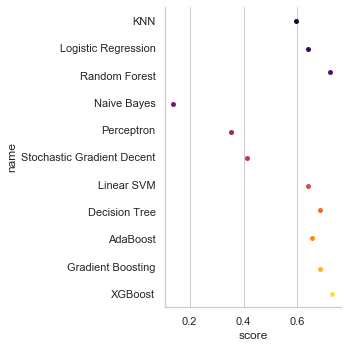

In [297]:
sns.catplot(x='score',y='name',palette='inferno',data=df)

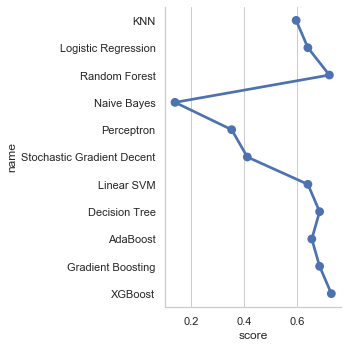

In [298]:
sns.factorplot(x='score',y='name',data=df)

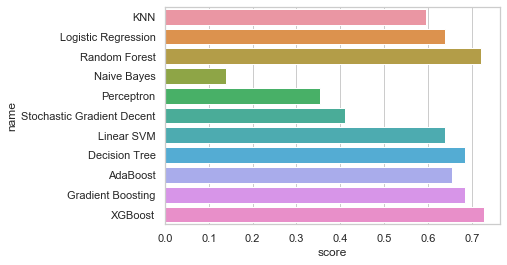

In [299]:
sns.barplot(x='score',y='name',data=df,saturation=0.75)

#### Result:  We could obtain the result that XGBoost classifier predicts at a higher accuracy compared to all others.

### 1.9 Prediction of class of cardiac arrhythmia

In [287]:
Y_pred_xgb = xgb.predict(X_test)

In [288]:
Y_pred_xgb

array([ 1,  6, 10,  1,  1,  1,  2,  2,  1,  1,  1, 15,  1,  6,  1,  6,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  4,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1, 10,  2,  1,  1,  2,  1,  1, 10,  9,  1,  1,  1,  1,  2,
        1,  1,  2,  1,  5,  1,  1,  1, 10,  1, 10, 10,  1,  1,  1,  1,  7,
        1,  1,  2,  1, 10,  1,  2,  1,  1,  1,  1,  6,  1,  1,  1,  1,  2,
        9,  1,  1, 10,  2,  1,  1,  1, 10,  1,  1, 10,  1,  1,  9,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1, 10, 10,  1,  1,  5,  1,  1,
        1,  6,  1,  1, 10,  3,  1,  1, 15,  9, 10,  1, 10,  1,  1,  1,  1],
      dtype=int64)